In [1]:
#coding=utf-8
import pandas as pd #Analysis 
import matplotlib as mpl
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
#import gc # 垃圾回收

import os
import string
#color = sns.color_palette()
sns.set()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random

SEED = 323

In [2]:
#中文支持
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})   

# EDA

In [3]:
train = pd.read_csv('./data/train_dataset.csv')
test = pd.read_csv('./data/test_dataset.csv')
train.shape, test.shape

((50000, 30), (50000, 29))

In [4]:
train.head(5)

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,159.20,180,0,3,83,1,75,0,0,0,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,145.10,110,0,3,21,1,16,0,0,0,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,120.20,70,0,1,59,0,1,0,0,0,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,167.42,90,0,3,78,1,26,0,0,0,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,101.00,80,0,3,70,1,44,0,0,0,1,0,522,0,64,59,0,0,0,648


In [5]:
test.head(5)

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数
0,7171737d49b143d1b38883a39e4a5730,1,30,0,0,0,22,1,99.8,69.53,50.38,190,0,4,19,0,2,0,0,0,1,0,281,0,74,807,0,0,2
1,3af0a449d5424488912e8fb2bf4b9faa,1,70,0,0,0,84,0,0.0,12.89,34.06,20,0,5,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,eb2cf02e0d5c4d1294dd73e776dbb441,1,35,0,0,0,237,0,0.0,161.71,171.09,120,0,2,206,0,84,1,0,1,1,1,186,0,943,261,0,0,0
3,9c0f780ecb254670a11aa9e3f10777c5,1,44,0,0,0,161,0,0.0,229.60,223.00,220,1,5,171,0,85,0,0,1,1,1,244,0,72,591,0,0,3
4,d794eed46c1e44f785a575f18b3023a5,1,44,0,0,0,153,1,99.8,105.42,103.60,50,0,4,77,0,81,0,0,0,1,1,132,0,0,88,0,0,0


In [6]:
corr_matrix = train.corr()

In [7]:
#plt.figure(figsize=(15,15))
#sns.heatmap((train).corr(), cmap="RdYlBu", vmin=-1, vmax=1)

In [8]:
corr = corr_matrix.abs().unstack().sort_values(ascending=False, kind="quicksort").reset_index()
#unstack n*n -> n^2*1
corr = corr[corr['level_0'] < corr['level_1']]
#corr.tail(30)
corr.head(25)

,level_0,level_1,0
30,用户账单当月总费用（元）,用户近6个月平均消费值（元）,0.903464
31,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,0.550815
33,信用分,用户网龄（月）,0.546893
36,信用分,用户近6个月平均消费值（元）,0.493749
37,信用分,当月通话交往圈人数,0.477302
40,当月通话交往圈人数,用户近6个月平均消费值（元）,0.470274
41,用户近6个月平均消费值（元）,缴费用户最近一次缴费金额（元）,0.459308
44,当月通话交往圈人数,用户账单当月总费用（元）,0.455292
45,用户账单当月总费用（元）,缴费用户最近一次缴费金额（元）,0.448055
48,信用分,用户账单当月总费用（元）,0.443064


In [9]:
corr_target = corr[corr['level_0']=='信用分']
corr_target.head(30)

,level_0,level_1,0
33,信用分,用户网龄（月）,0.546893
36,信用分,用户近6个月平均消费值（元）,0.493749
37,信用分,当月通话交往圈人数,0.477302
48,信用分,用户账单当月总费用（元）,0.443064
52,信用分,缴费用户最近一次缴费金额（元）,0.333539
63,信用分,当月是否景点游览,0.270870
80,信用分,用户话费敏感度,0.239400
86,信用分,当月是否体育场馆消费,0.233067
98,信用分,用户最近一次缴费距今时长（月）,0.215252
106,信用分,近三个月月均商场出现次数,0.197827


In [10]:
corr_matrix_test = test.corr()
corr_test = corr_matrix_test.abs().unstack().sort_values(ascending=False, kind="quicksort").reset_index()
#unstack n*n -> n^2*1
corr_test = corr_test[corr_test['level_0'] < corr_test['level_1']]
#corr_test.tail(30)
corr_test.head(30)

,level_0,level_1,0
29,用户账单当月总费用（元）,用户近6个月平均消费值（元）,0.907503
30,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,0.544417
32,当月通话交往圈人数,用户近6个月平均消费值（元）,0.461583
35,用户近6个月平均消费值（元）,缴费用户最近一次缴费金额（元）,0.454588
37,当月通话交往圈人数,用户账单当月总费用（元）,0.446623
39,用户账单当月总费用（元）,缴费用户最近一次缴费金额（元）,0.441895
40,当月是否体育场馆消费,当月是否景点游览,0.353338
43,当月是否体育场馆消费,近三个月月均商场出现次数,0.323710
45,当月视频播放类应用使用次数,是否4G不健康客户,0.316043
46,用户年龄,用户网龄（月）,0.315017


In [11]:
train.isnull().any().any()

False

In [12]:
test.isnull().any().any()

False

Distributions of last 28 columns


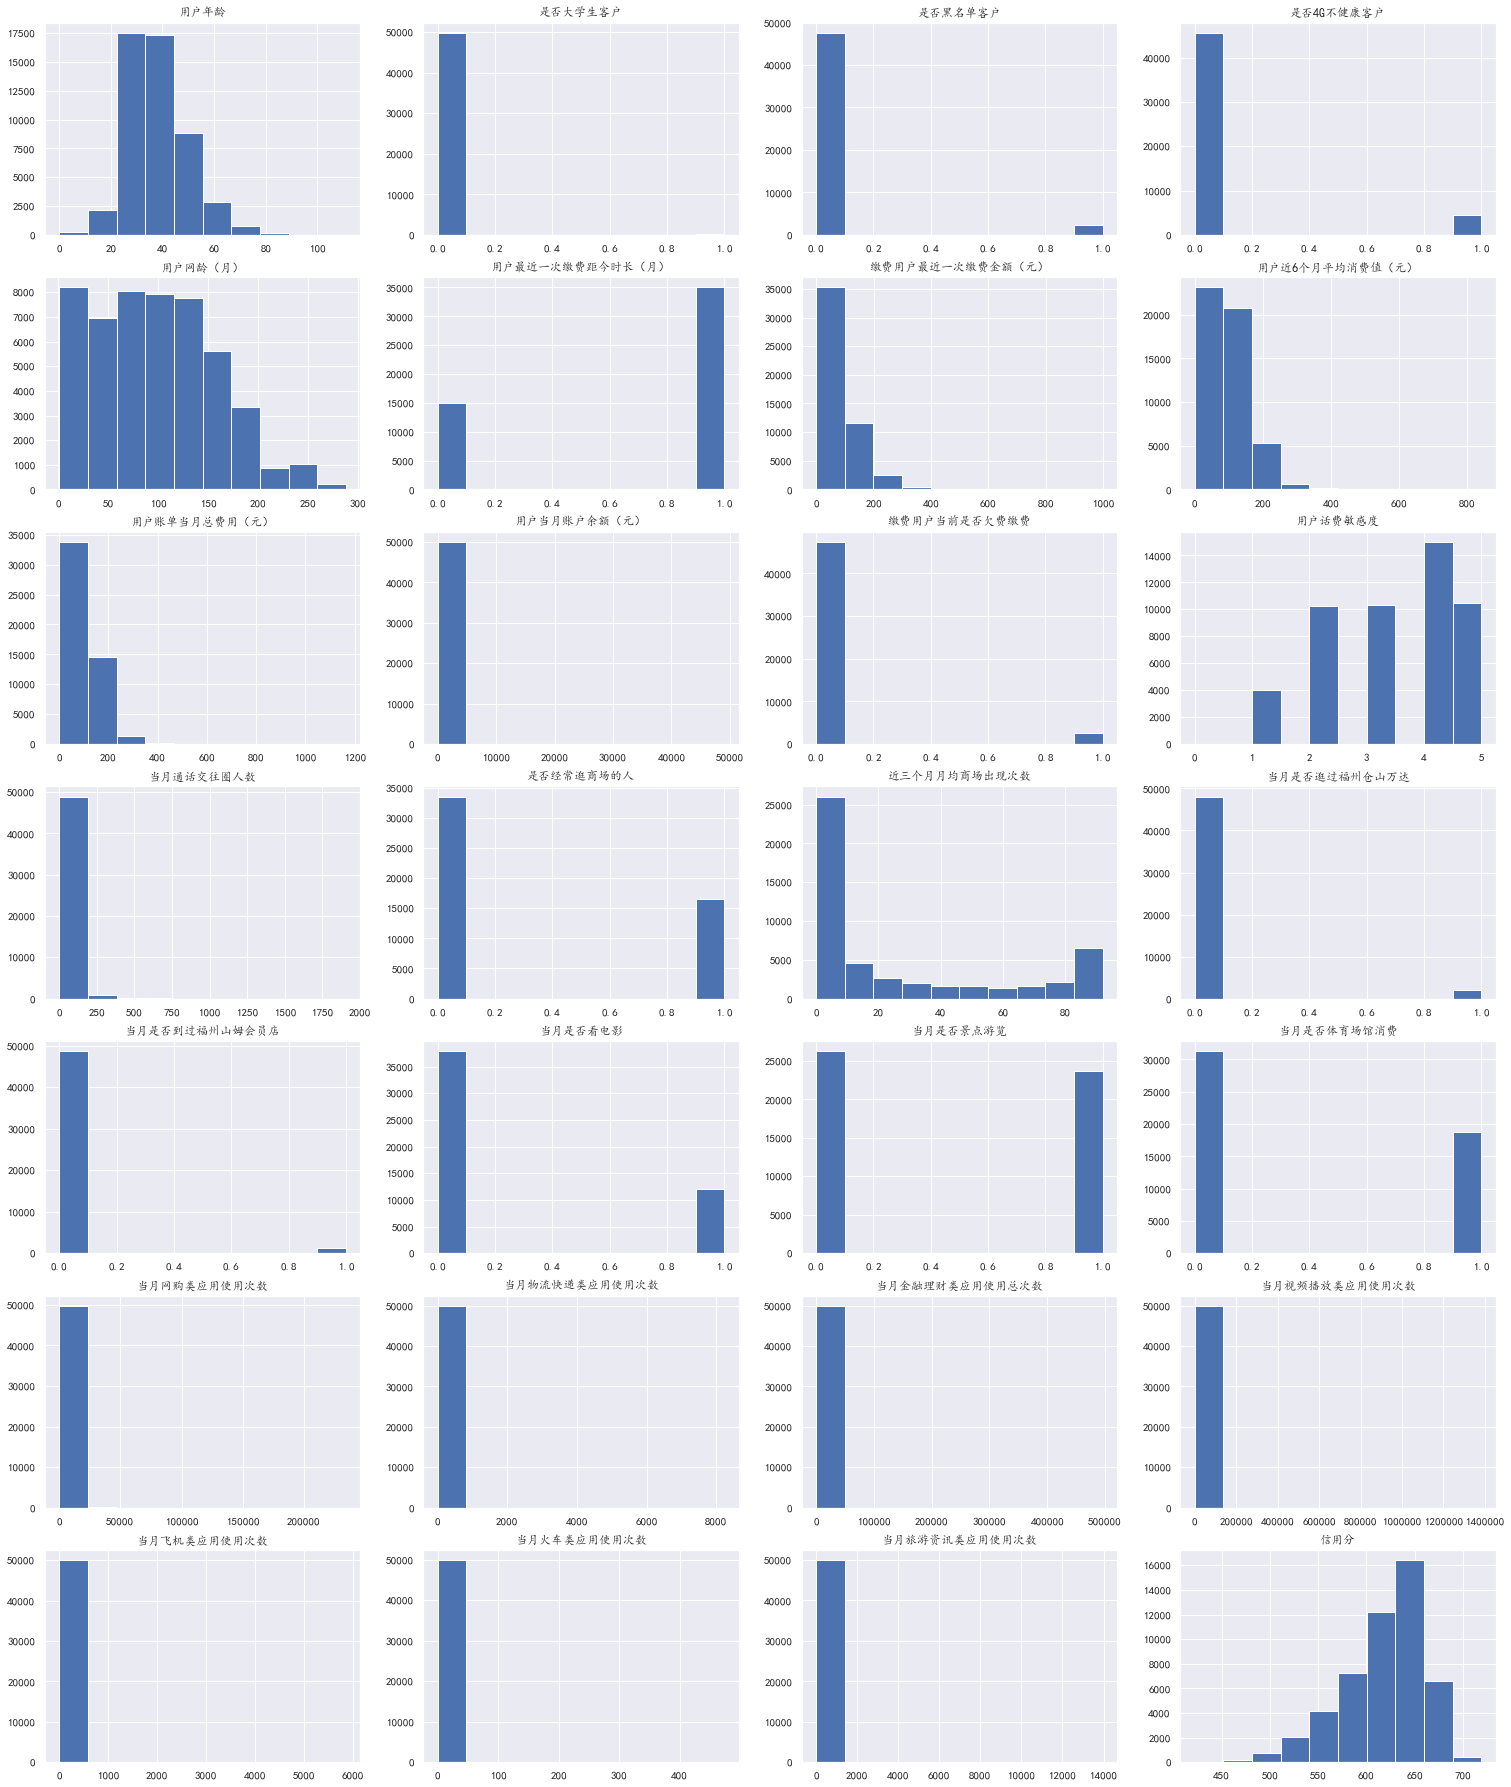

In [13]:
print('Distributions of last 28 columns')
plt.figure(figsize=(26, 32))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)

In [14]:
train['信用分'].value_counts(normalize=True).head(30)

640    0.01210
635    0.01194
644    0.01190
634    0.01188
629    0.01184
641    0.01160
646    0.01156
645    0.01134
637    0.01134
633    0.01126
630    0.01126
649    0.01126
652    0.01122
632    0.01122
647    0.01120
636    0.01118
651    0.01118
648    0.01108
627    0.01104
639    0.01094
642    0.01094
625    0.01092
650    0.01088
653    0.01086
654    0.01072
643    0.01064
638    0.01062
628    0.01042
657    0.01034
631    0.01024
Name: 信用分, dtype: float64

# Split dataset

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
train.pop('用户编码')
test.pop('用户编码')
y = train.pop('信用分')

In [17]:
n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)
repeated_folds = RepeatedStratifiedKFold(n_splits=n_fold, n_repeats=20, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

splits = folds.split(X_train, y)

# Modeling

In [19]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm

from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import GenericUnivariateSelect, SelectPercentile, SelectKBest, f_classif, mutual_info_classif, RFE

#train_df,y = SMOTE().fit_resample(train,y.ravel())

In [20]:
def train_model(X_train, X_test, y, params, splits, model_type='lgb', plot_feature_importance=False, averaging='usual', model=None):
    oof = np.zeros(len(X_train))
    prediction = np.zeros(len(X_test))
    scores = []
    feature_importance = pd.DataFrame()
    for i, (train_idx, valid_idx) in enumerate(splits):
        print('Fold', i, 'started at', time.ctime())
        X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
        y_train_fold, y_valid_fold = y[train_idx], y[valid_idx]
        
        #X_train_fold,y_train_fold = SMOTE().fit_resample(X_train_fold,y_train_fold.ravel())
        
        if model_type == 'lgb':
            train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
            valid_data = lgb.Dataset(X_valid_fold, label=y_valid_fold)
            
            model = lgb.train(params,
                    train_data,
                    num_boost_round=20000,
                    valid_sets = [train_data, valid_data],
                    verbose_eval=1000,
                    early_stopping_rounds = 200)
            
            y_pred_valid_fold = model.predict(X_valid_fold)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration)
            
#         if model_type == 'xgb':
#             train_data = xgb.DMatrix(data=X_train_fold, label=y_train_fold, feature_names=X_train_fold.columns)
#             valid_data = xgb.DMatrix(data=X_valid_fold, label=y_valid_fold, feature_names=X_train_fold.columns)

#             watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
#             model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
#             y_pred_valid_fold = model.predict(xgb.DMatrix(X_valid_fold, feature_names=X_train_fold.columns), ntree_limit=model.best_ntree_limit)
#             y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X_train_fold.columns), ntree_limit=model.best_ntree_limit)
        
#         if model_type == 'sklearn':
#             model = model
#             model.fit(X_train_fold, y_train_fold)
#             y_pred_valid_fold = model.predict_proba(X_valid_fold).reshape(-1,)
#             score = roc_auc_score(y_valid_fold, y_pred_valid_fold)
#             # print(f'Fold {i}. AUC: {score:.4f}.')
#             # print('')
            
#             y_pred = model.predict_proba(X_test)[:, 1]
            
#         if model_type == 'glm':
#             model = sm.GLM(y_train_fold, X_train_fold, family=sm.families.Binomial())
#             model_results = model.fit()
#             model_results.predict(X_test)
#             y_pred_valid_fold = model_results.predict(X_valid_fold).reshape(-1,)
#             score = roc_auc_score(y_valid_fold, y_pred_valid_fold)
            
#             y_pred = model_results.predict(X_test)
            
#         if model_type == 'cat':
#             model = CatBoostRegressor(iterations=20000, learning_rate=0.1, loss_function='Logloss',  eval_metric='AUC', **params)
#             model.fit(X_train_fold, y_train_fold, eval_set=(X_valid_fold, y_valid_fold), cat_features=[], use_best_model=True, verbose=False)

#             y_pred_valid_fold = model.predict_proba(X_valid_fold)
#             y_pred = model.predict_proba(X_test)
            
#         oof[valid_idx] = y_pred_valid_fold.reshape(-1,)
#         scores.append(roc_auc_score(y_valid_fold, y_pred_valid_fold))

        if averaging == 'usual':
            prediction += y_pred
        elif averaging == 'rank':
            prediction += pd.Series(y_pred).rank().values  
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = train.columns
            fold_importance["importance"] = model.feature_importance()
            fold_importance["fold"] = i + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction, scores
    
    else:
        return oof, prediction, scores

Fold 0 started at Fri Mar  8 22:00:39 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 13.8571	valid_1's l1: 14.7515
[2000]	training's l1: 13.2267	valid_1's l1: 14.6626
[3000]	training's l1: 12.8075	valid_1's l1: 14.649
Early stopping, best iteration is:
[2814]	training's l1: 12.8777	valid_1's l1: 14.6483
Fold 1 started at Fri Mar  8 22:00:50 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 13.8713	valid_1's l1: 14.745
[2000]	training's l1: 13.2372	valid_1's l1: 14.6754
Early stopping, best iteration is:
[2095]	training's l1: 13.1896	valid_1's l1: 14.6719
Fold 2 started at Fri Mar  8 22:00:58 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 13.8354	valid_1's l1: 14.8337
[2000]	training's l1: 13.2289	valid_1's l1: 14.7767
[3000]	training's l1: 12.818	valid_1's l1: 14.7628
Early stopping, best iteration is:
[2813]	training's l1: 12.8845	valid_1's l1: 14.7594
Fold 3 s

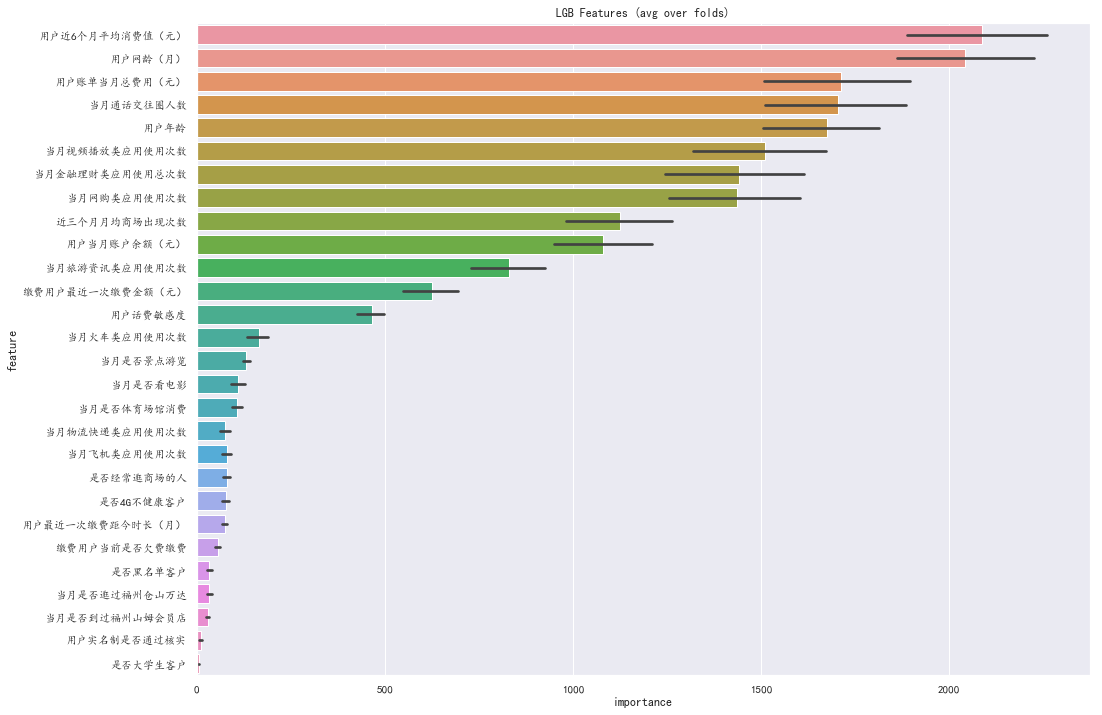

In [21]:
params = {'boosting_type': 'gbdt',
        'objective': 'mae',
        'n_estimators': 10000,
        'metric': 'mae',
        'learning_rate': 0.01,
        'min_child_samples': 46,
        'min_child_weight': 0.01,
        'subsample_freq': 2,
        'num_leaves': 40,
        'max_depth': 7,
        'subsample': 0.6,
        'colsample_bytree': 0.8,
        'reg_alpha': 0,
        'reg_lambda': 5,
        'verbose': -1,
        'seed': SEED,
        'num_threads': 6}
oof_lgb, prediction_lgb, scores = train_model(X_train, X_test, y, params=params, splits=splits, model_type='lgb', plot_feature_importance=True)

In [22]:
sub = pd.read_csv('./data/submit_example.csv')
sub['score'] = prediction_lgb.astype(int)
sub.to_csv('lgb.csv', index=False)

In [23]:
prediction_lgb

array([603.7245709 , 535.38320896, 672.23555585, ..., 547.52207717,
       542.14342792, 553.72086408])